In [ ]:
import pandas as pd
import re
import numpy as np

#import seaborn as sb
import matplotlib.pyplot as plt
import lightgbm as lgb
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from lightgbm import LGBMRegressor

#%pip install shap
#import shap

df = pd.read_csv("/content/dataFinal.csv")
sales = pd.read_csv("/content/sales.csv")

# Function to handle string lists

This function, named `cleanString`, is designed to process and clean a string containing numerical values. The steps performed by the function are as follows:

1. **Remove Ellipsis and Extra Spaces:**
   - The function uses regular expressions to remove any occurrences of ellipsis ('...') from the input string.
   - It then utilizes the `re.sub` function to replace multiple consecutive spaces with a single space.

2. **Add a Zero After the Decimal Point:**
   - The function appends a zero after the decimal point for single-digit integers in the cleaned string. For example, '2. ' becomes '2.0 '.

3. **Replace the Last '...' with ']':**
   - The function replaces the last occurrence of '...' in the cleaned string with ']'.

4. **Remove Brackets and Split by Space:**
   - The function removes the leading and trailing brackets from the cleaned string.
   - It then splits the string into individual values based on spaces.

5. **Convert to Numpy Array:**
   - The resulting split values are converted into a NumPy array of floating-point numbers using `np.array`.

6. **Return Resulting Array:**
   - The final cleaned and processed array is returned by the function.

To use this function, pass a string containing numerical values to it, and it will return a NumPy array after the specified cleaning operations.

In [ ]:
def cleanString(input_str):

    # Remove ellipsis and extra spaces
    cleaned_str = re.sub(r'\.{3}', '', input_str)
    cleaned_str = ' '.join(cleaned_str.split())

    # Add a zero after the decimal point for single-digit integers
    cleaned_str = cleaned_str.replace('. ', '.0 ')

    # Replace the last '...' with ']'
    cleaned_str = cleaned_str.replace('...', ']')

    input_str = ' '.join(cleaned_str.split())

    # Remove brackets and split by space
    split_values = input_str[1:-1].split()

    # Convert to numpy array
    result_array = np.array(split_values, dtype=float)

    return result_array.mean()

# Features Handling

This code snippet appears to perform the following operations on the DataFrame `df`:

1. **Loop over specified columns (`cols`):**
  
   It iterates over the columns specified in the list `cols`.

2. **Process each column's data:**

   It processes the data in each column by splitting the string, removing multiple spaces, and applying the `cleanString` function (not defined in the provided code). The results are stored in `listOfArrays`.

3. **Create a new DataFrame with processed data:**
   
   It creates a new DataFrame (`image_features_df`) from the processed data and assigns column names based on the original column names.

4. **Drop the original column and concatenate the new DataFrame:**

   It drops the original column from the DataFrame and concatenates the new DataFrame (`image_features_df`) along the columns.

5. **Drop a specific column ('Unnamed: 0'):**
   
   It drops the column named 'Unnamed: 0' from the DataFrame.

6. **Replace NaN values with zeros:**
   
   It replaces any NaN (Not a Number) values in the DataFrame with zeros.

Please note that the functionality of this code depends on the implementation of the `cleanString` function, which is not provided in the code snippet. Additionally, the success of the operations depends on the structure and content of the original DataFrame (`df`).

In [ ]:
cols = ['image_features', 'cat_gtrend', 'col_gtrend', 'fab_gtrend']

for col in cols:
    image_features_list = df[col].tolist()

    listOfArrays = []
    for str in image_features_list:

        # Replace multiple spaces with a single space
        input_str = ' '.join(str.split())
        result_array = cleanString(input_str)
        listOfArrays.append(result_array)

    #listOfArrays = df['image_features']

    #num_features = len(listOfArrays[1])

    image_features_df = pd.DataFrame(listOfArrays, columns=[col])
    #image_features_df = pd.DataFrame(listOfArrays, columns=[f"%s{i}" %col for i in range(num_features)])

    df = df.drop(col, axis=1)

    df = pd.concat([df, image_features_df], axis=1)

df = df.drop('Unnamed: 0', axis=1)

#replace NaN with zeros
df.fillna(0, inplace=True)

<ipython-input-2-0797632729ec>:21: RuntimeWarning: Mean of empty slice.
  return result_array.mean()
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
<ipython-input-2-0797632729ec>:21: RuntimeWarning: Mean of empty slice.
  return result_array.mean()
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
<ipython-input-2-0797632729ec>:21: RuntimeWarning: Mean of empty slice.
  return result_array.mean()
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


# Split Data

This code snippet appears to be preparing training and testing datasets by splitting the original DataFrame into features (X) and target variables (y), and then converting them into NumPy arrays. Here's a breakdown of the code:

1. **Define Features and Target Variables:**
  

   It selects specific columns from the DataFrame `df` to create separate DataFrames for training features (`x_train`), training targets (`y_train`), testing features (`x_test`), and testing targets (`y_test`).

2. **Convert DataFrames to NumPy Arrays:**
  

   It converts the selected DataFrames into NumPy arrays. This is a common step before feeding the data into machine learning models, as many machine learning libraries (including scikit-learn and TensorFlow) work with NumPy arrays.

After running this code, you will have four NumPy arrays (`x_train`, `y_train`, `x_test`, and `y_test`) that can be used for training and testing machine learning models. Make sure that the dimensions of these arrays are appropriate for the specific machine learning algorithm you plan to use.

In [ ]:
#split data
x_train = df[['category_encoded', 'fabric_encoded',
       'color_encoded', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       'image_features', 'cat_gtrend', 'col_gtrend', 'fab_gtrend']]

y_train = df[['10']]

x_test = df[['category_encoded', 'fabric_encoded',
       'color_encoded', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       'image_features', 'cat_gtrend', 'col_gtrend', 'fab_gtrend']]

y_test = df[['11']]

#convert to numpy
x_train = x_train.to_numpy()
y_train = y_train.to_numpy()
x_test = x_test.to_numpy()
y_test = y_test.to_numpy()

# Standardaization

The provided code standardizes the features of a machine learning dataset using the `StandardScaler` from scikit-learn. It involves the following steps:



1. **Define Features and Target Variables:**
   - Select specific columns from the dataset for training and testing features (`x_train` and `x_test`) and targets (`y_train` and `y_test`).

2. **Convert DataFrames to NumPy Arrays:**
   - Convert the selected DataFrames into NumPy arrays, which is a common step before feeding data into machine learning models.

3. **Standardize Features:**
   - Create an instance of the `StandardScaler`.
   - Fit the scaler to the training data to compute mean and standard deviation.
   - Transform both the training and testing data using the computed statistics for standardization.

After this preprocessing, the features are standardized, meaning they have a mean of 0 and a standard deviation of 1, making them suitable for certain machine learning algorithms that benefit from standardized input features.

In [ ]:
# Standardize Features

# Use StandardScaler to scale the training and validation data
scaler = StandardScaler()
#Fit the StandardScaler to the training data
scaler.fit(x_train)
# transform both the training and validation data
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

# LGBM Configuration

Certainly! The provided code is for creating and configuring a LightGBM (Gradient Boosting Machine) regression model using the LightGBM library. Here's a step-by-step explanation:

1. **Create LightGBM Dataset:**
   - This creates LightGBM Datasets (`train_data` and `test_data`) from your training (`x_train`, `y_train`) and testing (`x_test`, `y_test`) data.
   - `x_train` and `x_test` are the feature matrices.
   - `y_train` and `y_test` are the corresponding target values.

2. **Define Model Parameters:**
   - `params` is a dictionary containing various parameters that configure the LightGBM model. Here are some key parameters:
     - `'objective': 'regression'`: Specifies that this is a regression task.
     - `'metric': 'mse'`: Uses Mean Squared Error as the evaluation metric.
     - `'boosting_type': 'gbdt'`: Specifies the type of boosting algorithm (Gradient Boosting Decision Tree).
     - `'num_leaves': 31`: The maximum number of leaves in each tree.
     - `'learning_rate': 0.05`: The learning rate, controlling the step size during optimization.
     - `'feature_fraction': 0.9`: Fraction of features to be randomly sampled for each boosting round.

3. **Training the Model:**
   You would use these datasets and parameters to train your LightGBM regression model. Assuming the training code follows this configuration, it might look something like:
  
   - `num_boost_round`: Number of boosting rounds (iterations).
   - `valid_sets`: List of validation sets (in this case, `test_data`).
   - `early_stopping_rounds`: If the model's performance doesn't improve for a certain number of rounds, training will stop early.

4. **Prediction:**
   After training, you can use the trained model for making predictions on new data.

This code sets up the data, defines the model parameters, and creates a LightGBM regression model for training and evaluation. Adjust the parameters based on your specific requirements and dataset characteristics.

In [ ]:
#create lgb dataset
train_data = lgb.Dataset(x_train, label=y_train)

test_data = lgb.Dataset(x_test, label=y_test, reference=train_data)

# Define a dictionary of parameters for configuring the LightGBM regression model.
params = {
    'objective': 'regression',
    'metric': 'mse',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
}

# Training

In this code snippet, you are training a LightGBM regression model with a specified number of boosting rounds (`num_round = 1000`).

- `num_round`: This variable sets the number of boosting rounds or iterations for training the LightGBM model. In this case, you've set it to 1000 rounds.

- `bst`: After training, the variable `bst` holds the trained LightGBM model.

- `lgb.train`: This function is used to train the LightGBM model. It takes several parameters:
  - `params`: The dictionary of parameters configuring the model.
  - `train_data`: The training dataset (`lgb.Dataset`) containing features (`x_train`) and labels (`y_train`).
  - `num_round`: The number of boosting rounds.

- `valid_sets=[test_data]`: This parameter specifies the validation dataset(s) used for evaluating the model's performance during training. In this case, you are using the test dataset (`test_data`) as the validation set.


In [ ]:
# Set the number of rounds and train the model with early stopping
num_round = 1000
bst = lgb.train(params, train_data, num_round, valid_sets=[
                test_data])#, early_stopping_rounds=50)


/usr/local/lib/python3.10/dist-packages/lightgbm/basic.py:300: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.017512 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1386
[LightGBM] [Info] Number of data points in the train set: 106850, number of used features: 17
[LightGBM] [Info] Start training from score 0.763014


# Features

This code snippet is used to plot the feature importance of the trained LightGBM model.



- `lgb.plot_importance`: This function is part of LightGBM's plotting utilities and is used to generate a bar plot of feature importance. It takes several parameters:
  - `bst`: The trained LightGBM model.
  - `max_num_features=10`: The maximum number of features to display in the plot. In this case, it is set to 10.
  - `figsize=(10, 6)`: The size of the figure (width, height) in inches.
  - `importance_type='split'`: The type of importance to be plotted. `'split'` represents the number of times a feature is used to split the data.

- `plt.show()`: This command displays the generated plot.

The resulting plot will show the importance of the top features based on the specified importance type ('split'). Features that are frequently used for splitting the data during the training process are considered more important. Adjust the parameters as needed for your visualization preferences.

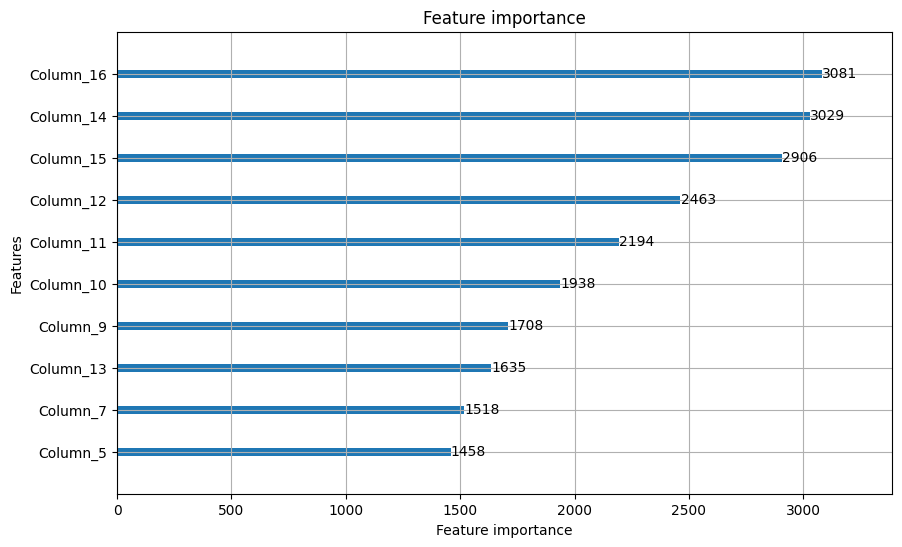

In [ ]:
# Plot feature importance
lgb.plot_importance(bst, max_num_features=10, figsize=(10, 6), importance_type='split')
plt.show()

# Gain

This code defines a function `plot_lgb_importances` for plotting or returning feature importances from a trained LightGBM model.

Explanation:

- The function `plot_lgb_importances` takes a LightGBM model (`model`), a flag to decide whether to plot the feature importances (`plot`), and the number of top features to display (`num`).

- It calculates feature importances using the LightGBM API (`model.feature_importance`) and constructs a DataFrame (`feat_imp`) containing the feature names, split counts, and gains.

- If `plot` is set to `True`, it generates a bar plot using Seaborn to visualize the top 25 features based on gain.

- If `plot` is `False`, it prints the top `num` features based on gain and returns the DataFrame.

- The example usage at the end calls the function with `plot=True` to generate a plot and `num=50` to print and return the top 50 features based on gain.

In [ ]:
def plot_lgb_importances(model, plot=False, num=10):
    from matplotlib import pyplot as plt
    import seaborn as sns

    # LGBM API
    #gain = model.feature_importance('gain')
    #feat_imp = pd.DataFrame({'feature': model.feature_name(),
    #                         'split': model.feature_importance('split'),
    #                         'gain': 100 * gain / gain.sum()}).sort_values('gain', ascending=False)


    gain = model.feature_importance(importance_type='gain')
    feat_imp = pd.DataFrame({'feature': model,
                             'split': model.feature_importance(importance_type='split'),
                             'gain': 100 * gain / gain.sum()}).sort_values('gain', ascending=False)
    if plot:
        plt.figure(figsize=(10, 10))
        sns.set(font_scale=1)
        sns.barplot(x="gain", y="feature", data=feat_imp[0:25])
        plt.title('feature')
        plt.tight_layout()
        plt.show()
    else:
        print(feat_imp.head(num))
        return feat_imp

feature_imp_df = plot_lgb_importances(bst, num=50)

                                              feature  split       gain
12  <lightgbm.basic.Booster object at 0x7d87029e7cd0>   2463  40.088366
11  <lightgbm.basic.Booster object at 0x7d87029e7cd0>   2194   8.245622
16  <lightgbm.basic.Booster object at 0x7d87029e7cd0>   3081   7.019643
15  <lightgbm.basic.Booster object at 0x7d87029e7cd0>   2906   6.146403
10  <lightgbm.basic.Booster object at 0x7d87029e7cd0>   1938   6.015415
14  <lightgbm.basic.Booster object at 0x7d87029e7cd0>   3029   5.873713
9   <lightgbm.basic.Booster object at 0x7d87029e7cd0>   1708   5.255733
7   <lightgbm.basic.Booster object at 0x7d87029e7cd0>   1518   4.089370
13  <lightgbm.basic.Booster object at 0x7d87029e7cd0>   1635   2.733345
4   <lightgbm.basic.Booster object at 0x7d87029e7cd0>   1391   2.492736
8   <lightgbm.basic.Booster object at 0x7d87029e7cd0>   1441   2.279445
6   <lightgbm.basic.Booster object at 0x7d87029e7cd0>   1438   2.169831
1   <lightgbm.basic.Booster object at 0x7d87029e7cd0>   1259   2

# Final Evaluation

This code segment makes predictions using a LightGBM model (`bst`) on the training and validation data and calculates the Mean Squared Error (MSE) for both sets.
Explanation:

- `bst.predict(x_train)` and `bst.predict(x_test)`: These lines generate predictions on the training and validation data using the trained LightGBM model (`bst`).

- The Mean Squared Error (MSE) is calculated for both the training and validation predictions using the `mse` function. The `mse` function is assumed to be defined elsewhere in the code.

- The calculated MSE values are then printed to the console.

Make sure to define the `mse` function or use an appropriate alternative for calculating the MSE. Additionally, ensure that the necessary libraries (including LightGBM) are imported before running this code.

In [ ]:
# Make predictions on the training and validation data.
y_train_pred = bst.predict(x_train)
y_test_pred = bst.predict(x_test)

# Calculate and print the  Mean Squared Error (MSE) for training and validation predictions.
print("Training MSE: ", (mse(y_train, y_train_pred)))
print("Validation MSE: ", (mse(y_test, y_test_pred)))

mode_mae = mae(y_test, y_test_pred)

mae_values = []
mae_values.append({"model":mode_mae})
print("Model Validation mode_mae : ", mode_mae)

Training MSE:  0.8919814632467338
Validation MSE:  1.3144751767550007
Model Validation mode_mae :  0.7208098601939922


In [ ]:
#Weighted Absolute Percent Error
model_wape = ((mae(y_test,y_test_pred)*int(len(y_test_pred)) ) / sum(y_test)[0])*100
print("Model Validation wape : ", model_wape)

wape_values = []
wape_values.append({"model": model_wape})

Model Validation wape :  111.10258440571256


## **Plot Sample Predictions**


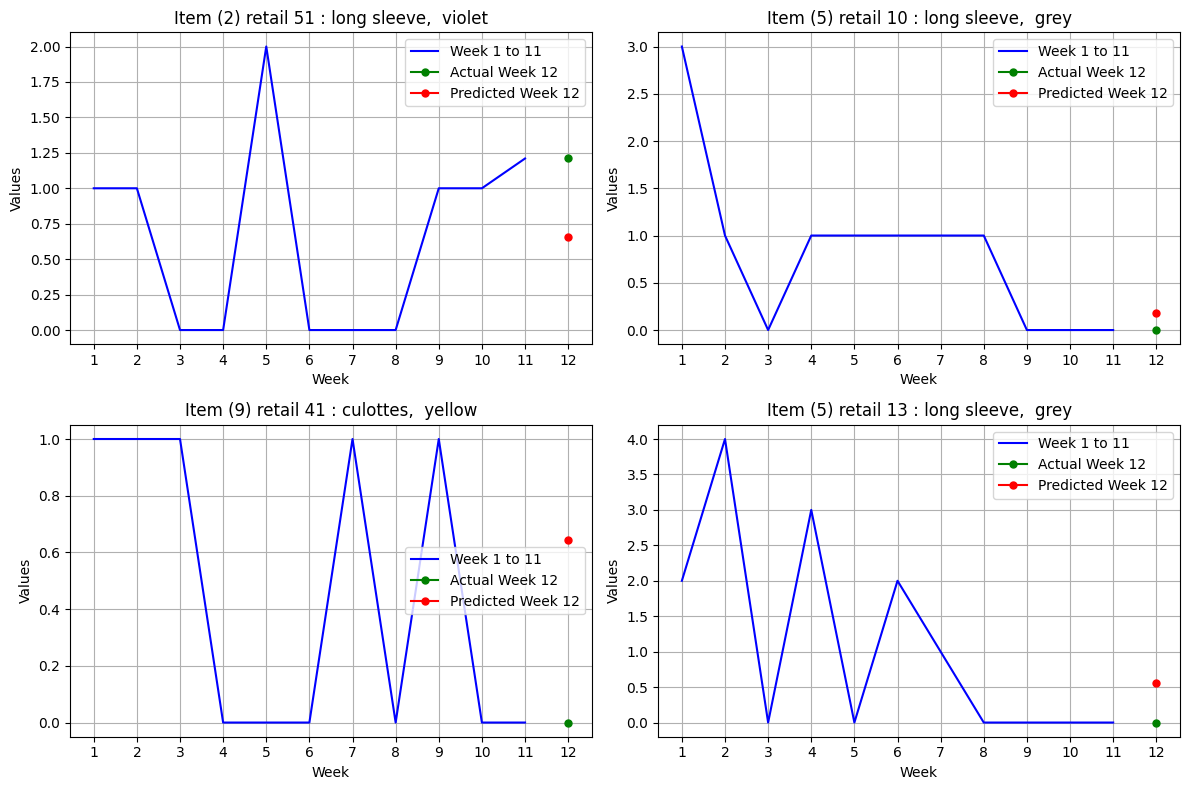

In [ ]:
# inverse transformation
x_test_original = scaler.inverse_transform(x_train)
x_test_original = scaler.inverse_transform(x_test)

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

for i, ax in enumerate(axs.flat, start=1):
    # Plot original data from week 1 to 11 in blue
    ax.plot(range(1, 12), x_test_original[i, 3:14], color='blue', label='Week 1 to 11')

    # Plot actual data for week 12 in green
    ax.plot(12, x_test_original[i, 13], marker='o', markersize=5, color='green', label='Actual Week 12')

    # Plot predicted data for week 12 in red
    ax.plot(12, y_test_pred[i], marker='o', markersize=5, color='red', label='Predicted Week 12')

    ax.set_xticks(range(1, 13))  # Set the x-axis ticks from 1 to 12
    ax.set_xlabel('Week')
    ax.set_ylabel('Values')
    ax.set_title(f'Item ({sales.external_code[i]}) retail {sales.retail[i]} : {sales.category[i]},  {sales.color[i]}')
    ax.legend()
    # Add a grid to the subplot
    ax.grid(True)

plt.tight_layout()
plt.show()


# Time Series Split A.K.A Walk Forward

This code snippet demonstrates the use of time series cross-validation with LightGBM using the `TimeSeriesSplit` method from scikit-learn:

Explanation:

- `TimeSeriesSplit(n_splits=5)`: Creates an instance of the `TimeSeriesSplit` class with 5 splits. You can adjust the number of splits based on your requirements.

- `cross_val_score`: Performs cross-validation for the LightGBM regressor using time series splitting.

- Individual cross-validation scores are printed to the console.

- The mean cross-validation score is calculated and printed.

Ensure that you have the necessary libraries installed (`scikit-learn` and `lightgbm`) and imported before running this code. Adjust the parameters and data according to your specific use case.

In [ ]:
params = {
    'objective': 'regression',
    'metric': 'mse',  # Adjust metric as needed
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
}

In [ ]:
from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit(n_splits=5)  # Adjust n_splits as needed
scores = cross_val_score(lgb.LGBMRegressor(**params), x_train, y_train, cv=tscv)

# Access and print individual scores
print(scores)

# Calculate mean cross-validation score
print("Walk Forward Mean CV Score:", scores.mean())


# Initialize TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)
model = lgb.LGBMRegressor(**params)
# Loop over each split
for train_index, test_index in tscv.split(x_train):
    # Create training and test sets
    x_train_temp, x_test_temp = x_train[train_index], x_train[test_index]
    y_train_temp, y_test_temp = y_train[train_index], y_train[test_index]

    # Fit the model on the training data
    model.fit(x_train_temp, y_train_temp)

    # Make predictions (if needed)
    y_pred = model.predict(x_test_temp)


y_test_pred = model.predict(x_test)
#Weighted Mean Absolute Percent Error
wf_wape = ((mae(y_test,y_test_pred)*int(len(y_test_pred)) ) / sum(y_test)[0])*100
print("Model Validation wape : ", wf_wape)
wape_values.append({"walk_forward": wf_wape})

wf_mae = mae(y_test, y_test_pred)
mae_values.append({"walk_forward": wf_mae})
print("Model Validation wf_mae : ", wf_mae)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000919 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1265
[LightGBM] [Info] Number of data points in the train set: 17810, number of used features: 17
[LightGBM] [Info] Start training from score 0.688995
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current va

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002795 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1360
[LightGBM] [Info] Number of data points in the train set: 53426, number of used features: 17
[LightGBM] [Info] Start training from score 0.786864
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012033 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1374
[LightGBM] [Info] Number of data points in the train set: 71234, number of used features: 17
[LightGBM] [Info] Start training from score 0.751748
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004459 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1382
[LightGBM] [Info] Number of data points in the train set: 89042, number of used features: 17
[LightGBM] [Info] Start training from score 0.782462
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[0.22178656 0.28686166 0.3587323  0.3717489  0.14577844]
Walk Forward Mean CV Score: 0.27698157256979217
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fracti

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001926 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1334
[LightGBM] [Info] Number of data points in the train set: 35618, number of used features: 17
[LightGBM] [Info] Start training from score 0.723146


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.023135 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1360
[LightGBM] [Info] Number of data points in the train set: 53426, number of used features: 17
[LightGBM] [Info] Start training from score 0.786864
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.018578 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1374
[LightGBM] [Info] Number of data points in the train set: 71234, number of used features: 17
[LightGBM] [Info] Start training from score 0.751748
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.050629 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1382
[LightGBM] [Info] Number of data points in the train set: 89042, number of used features: 17
[LightGBM] [Info] Start training from score 0.782462
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
Model Validation wape :  112.82175403866417
Model Validation wf_mae :  0.7319634659305828


# group_time_series_cv

The provided code performs Group Time Series Cross-Validation using the LightGBM (LGBM) regressor. Here's a breakdown of the code:

1. Import necessary libraries:
   
   These libraries provide tools for time series cross-validation and evaluation metrics.

2. Define a function `group_time_series_cv` for performing Group Time Series Cross-Validation:
  
   The function takes a model, feature matrix (`X`), target variable (`y`), group labels (`groups`), and the number of splits as input.

3. Initialize `GroupKFold` with a specified number of splits:
   
   This prepares the cross-validation iterator, ensuring that groups are kept together during the splits.

4. Initialize an empty list to store mean squared error (MSE) scores:
  

5. Convert the input features (`X`), target variable (`y`), and group labels (`groups`) to Pandas DataFrames:
  
   This step might be necessary if the input data is not already in DataFrame format.

6. Loop through the cross-validation splits and train the model:
   

7. Convert the list of MSE scores to a NumPy array:
   

8. Return the array of MSE scores:
   

9. Define a  model with specified parameters:
   

10. Extract group labels for the cross-validation from the last column of the training data:
  

11. Perform Group Time Series Cross-Validation using the defined function:
   

12. Print the mean squared error across all folds:
   
   This provides an average measure of model performance across the specified number of cross-validation folds.

In [ ]:
from sklearn.model_selection import TimeSeriesSplit, GroupKFold
from sklearn.metrics import mean_squared_error

def group_time_series_cv(model, X, y, groups, n_splits=5):

    gkf = GroupKFold(n_splits=n_splits)
    mse_scores = []

    X = pd.DataFrame(X)
    y = pd.DataFrame(y)
    groups = pd.DataFrame(groups)

    for train_index, test_index in gkf.split(X, y, groups=groups):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Train the model
        model.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = model.predict(X_test)

        # Evaluate performance (you can replace this with your preferred metric)
        mse = mean_squared_error(y_test, y_pred)

        mse_scores.append(mse)

        # Optionally, you may update the model parameters here based on performance
    mse_scores = np.array(mse_scores)
    return mse_scores, model

model_i = lgb.LGBMRegressor(**params)

groups = x_train[:,14] #choose Last week
mse_scores, model = group_time_series_cv(model_i, x_train, y_train, groups, n_splits=2)
print("Mean Squared Error:", mse_scores.mean())


y_test_pred = model.predict(x_test)
#Weighted Absolute Percent Error
gts_wape = ((mae(y_test,y_test_pred)*int(len(y_test_pred)) ) / sum(y_test)[0])*100
print("Model Validation wape : ", gts_wape)
wape_values.append({"group_TS": gts_wape})


gts_mae = mae(y_test, y_test_pred)
mae_values.append({"group_TS": gts_mae})
print("Model Validation gts_mae : ", gts_mae)

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015080 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1353
[LightGBM] [Info] Number of data points in the train set: 53425, number of used features: 17
[LightGBM] [Info] Start training from score 0.780664
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Info] Auto-choosing col-wi

# Purged Group Time Series

performs Iterative Purged Group Time Series Cross-Validation using the LightGBM (LGBM) regressor and evaluates the model's performance using the mean squared error metric.

1. Import necessary libraries including NumPy, Pandas, and scikit-learn functions.
2. Define a function `purged_group_time_series_cv_iterative` that performs purged group time series cross-validation iteratively.
    - It initializes an LGBMRegressor model.
    - It creates a DataFrame with target variable, group labels, and features.
    - It iterates over the specified number of splits, filtering training and validation sets based on unique groups.
    - It purges overlapping data points within the training set to prevent leakage.
    - It trains the model on the purged training set and evaluates it on the validation set.
    - It calculates the mean squared error for each fold and returns an array of MSE scores.

3. Extract group labels for cross-validation from the last column of the training data.
4. Set the number of splits (`n_splits`) and the group gap (`group_gap`).
5. Perform Iterative Purged Group Time Series Cross-Validation using the defined function.
6. Print the mean squared error across all folds.



In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GroupKFold

def purged_group_time_series_cv_iterative(X, y, groups, n_splits, group_gap ):

    model = lgb.LGBMRegressor(**params)

    mse_scores = []


    df = pd.DataFrame({'y': y.ravel(), 'groups': groups.ravel()})
    df = pd.concat([df, pd.DataFrame(X, columns=[f'feature{i+1}' for i in range(X.shape[1])])], axis=1)

    # Find the unique groups
    unique_groups = df['groups'].unique()

    # Loop over folds
    for i in range(n_splits):
        # Split the groups into training and validation sets
        train_groups = unique_groups[:i + 1]
        val_groups = unique_groups[i + 1:i + 2]

        # Filter the data based on the selected groups
        train_data = df[df['groups'].isin(train_groups)]
        val_data = df[df['groups'].isin(val_groups)]

        # Purge overlapping data points within the training set
        train_data_purged = train_data.iloc[:-group_gap]

        # Extract features and target variables
        X_train = train_data_purged.iloc[:, 2:19]
        y_train = train_data_purged['y']

        X_val = val_data.iloc[:, 2:19]
        y_val = val_data['y']

        # Train the model
        model.fit(X_train, y_train)

        # Make predictions on the validation set
        y_pred = model.predict(X_val)

        # Evaluate performance (you can replace this with your preferred metric)
        mse = mean_squared_error(y_val, y_pred)
        mse_scores.append(mse)

    mse_scores = np.array(mse_scores)

    return mse_scores, model


groups = x_train[:,14] #choose Last week

# Set the number of splits for cross-validation
n_splits = 5

# Set the group gap
group_gap = 5

# Perform Iterative Purged Group Time Series Cross-Validation
mse_scores, model = purged_group_time_series_cv_iterative(x_train, y_train, groups, n_splits=n_splits, group_gap=group_gap)

print("Mean Squared Error", mse_scores.mean())

y_test_pred = model.predict(x_test)
#Weighted  Absolute Percent Error
pgts_wape = ((mae(y_test,y_test_pred)*int(len(y_test_pred)) ) / sum(y_test)[0])*100
print("Model Validation wape : ", pgts_wape)
wape_values.append({"Purged_Group_TS": pgts_wape})

pgts_mae = mae(y_test, y_test_pred)
mae_values.append({"Purged_Group_TS": pgts_mae})
print("Model Validation Purged_Group_TS : ", pgts_mae)


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 3, number of used features: 0
[LightGBM] [Info] Start training from score 0.333333
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because ther

# Combined purged group

performs Combined Purged Group time series Cross-Validation using the LightGBM (LGBM) regressor and evaluates the model's performance using the mean squared error metric.

1. Import necessary libraries including NumPy, Pandas, scikit-learn functions, and the LightGBM module.
2. Define a function `comb_purged_group_kfold_cv` that performs Combinatorial Purged Group K-Fold Cross-Validation.
    - It initializes an LGBMRegressor model.
    - It creates a DataFrame with target variable, group labels, and features.
    - It iterates over Group K-Fold splits, extracting training and validation sets.
    - For each validation set, it further iterates over Combinatorial Purged Group K-Fold splits.
    - It purges overlapping data points within the training set and extracts embargoed data points in the validation set.
    - It trains the model on the purged training set and evaluates it on the embargoed validation set.
    - It calculates the mean squared error for each fold and returns an array of MSE scores.

3. Extract group labels for cross-validation from the last column of the training data.
4. Set the number of splits for Group K-Fold cross-validation (`n_splits`), embargo duration (`embargo`), and group gap (`group_gap`).
5. Perform Combinatorial Purged Group K-Fold Cross-Validation using the defined function.
6. Print the mean squared error across all folds.



In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GroupKFold
from sklearn.metrics import mean_squared_error

def comb_purged_group_kfold_cv(X, y, groups, n_splits=5, embargo=5, group_gap=5):

    # Initialize the model
    model = lgb.LGBMRegressor(**params)

    mse_scores = []

    # Create a DataFrame to simplify indexing
    df = pd.DataFrame({'y': y.ravel(), 'groups': groups.ravel()})
    df = pd.concat([df, pd.DataFrame(X, columns=[f'feature{i+1}' for i in range(X.shape[1])])], axis=1)

    # Find the unique groups
    unique_groups = df['groups'].unique()

    # Initialize Group K-Fold
    gkf = GroupKFold(n_splits=n_splits)

    # Loop over folds
    for train_index, test_index in gkf.split(X, y, groups=groups):
        # Extract training and validation sets
        X_train, X_val = X[train_index], X[test_index]
        y_train, y_val = y[train_index], y[test_index]

        # Extract unique groups in the training set
        train_groups = np.unique(groups[train_index])

        # Initialize Combinatorial Purged Group K-Fold
        comb_purged_gkf = GroupKFold(n_splits=2)

        # Loop over combinatorial purged folds
        for _, comb_purged_val_index in comb_purged_gkf.split(X_val, groups=groups[test_index]):
            comb_purged_val_index = comb_purged_val_index[0]

            # Purge overlapping data points within the training set
            purge_mask = (groups[train_index] != groups[test_index][comb_purged_val_index])
            X_train_purged = X_train[purge_mask]
            y_train_purged = y_train[purge_mask]

            # Extract embargoed data points in the validation set
            embargo_mask = (groups[test_index] != groups[test_index][comb_purged_val_index]) & (
                    groups[test_index] != groups[test_index][comb_purged_val_index - embargo])
            X_val_embargoed = X_val[embargo_mask]
            y_val_embargoed = y_val[embargo_mask]

            # Train the model
            model.fit(X_train_purged, y_train_purged)

            # Make predictions on the embargoed validation set
            y_pred_embargoed = model.predict(X_val_embargoed)

            # Evaluate performance on the embargoed validation set
            mse = mean_squared_error(y_val_embargoed, y_pred_embargoed)
            mse_scores.append(mse)

    mse_scores = np.array(mse_scores)
    return mse_scores, model

groups = x_train[:,14] #choose Last week

# Set the number of splits for cross-validation
n_splits = 5

# Set the embargo and group gap
embargo = 5
group_gap = 5

# Perform Combinatorial Purged Group K-Fold Cross-Validation
mse_scores, model = comb_purged_group_kfold_cv(x_train, y_train, groups, n_splits=n_splits, embargo=embargo, group_gap=group_gap)

print("Mean Squared Error", mse_scores.mean())


y_test_pred = model.predict(x_test)
#Weighted  Absolute Percent Error
cpkf_wape = ((mae(y_test,y_test_pred)*int(len(y_test_pred)) ) / sum(y_test)[0])*100
print("Model Validation wape : ", cpkf_wape)
wape_values.append({"Combined_purged_group": cpkf_wape})

cpkf_mae = mae(y_test, y_test_pred)
print("Model Validation mae : ", cpkf_mae)
mae_values.append({"Combined_purged_group": cpkf_mae})


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.025847 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1373
[LightGBM] [Info] Number of data points in the train set: 85480, number of used features: 17
[LightGBM] [Info] Start training from score 0.752141
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.023675 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1373
[LightGBM] [Info] Number of data points in the train set: 85480, number of used features: 17
[LightGBM] [Info] Start training from score 0.752141
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004349 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1375
[LightGBM] [Info] Number of data points in the train set: 85480, number of used features: 17
[LightGBM] [Info] Start training from score 0.778545
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.016784 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1375
[LightGBM] [Info] Number of data points in the train set: 85480, number of used features: 17
[LightGBM] [Info] Start training from score 0.778545
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004415 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1377
[LightGBM] [Info] Number of data points in the train set: 85480, number of used features: 17
[LightGBM] [Info] Start training from score 0.766928
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004828 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1377
[LightGBM] [Info] Number of data points in the train set: 85480, number of used features: 17
[LightGBM] [Info] Start training from score 0.766928
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006300 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1381
[LightGBM] [Info] Number of data points in the train set: 85480, number of used features: 17
[LightGBM] [Info] Start training from score 0.762599
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004354 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1381
[LightGBM] [Info] Number of data points in the train set: 85480, number of used features: 17
[LightGBM] [Info] Start training from score 0.762599
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004303 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1382
[LightGBM] [Info] Number of data points in the train set: 85480, number of used features: 17
[LightGBM] [Info] Start training from score 0.754855
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004307 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1382
[LightGBM] [Info] Number of data points in the train set: 85480, number of used features: 17
[LightGBM] [Info] Start training from score 0.754855
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
Mean Squared Error 1.6103290440730464
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
Model Validation wape :  112.69383548568723
Model Validation mae :  0.7311335576545447


## **Compare WAPE Results**


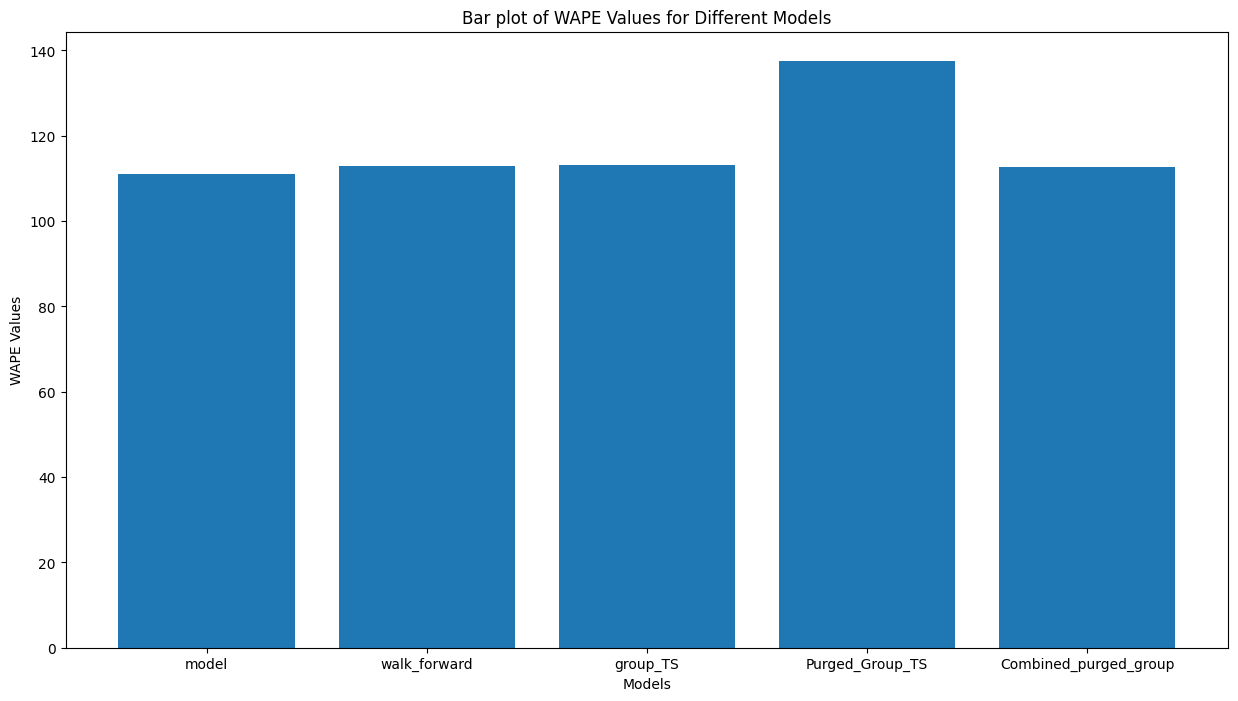

In [ ]:
models = [list(item.keys())[0] for item in wape_values]
values = [list(item.values())[0] for item in wape_values]

# Create the bar plot
plt.figure(figsize=(15, 8))

plt.bar(models, values)
plt.xlabel('Models')
plt.ylabel('WAPE Values')
plt.title('Bar plot of WAPE Values for Different Models')
plt.show()

## **Compare MAE**

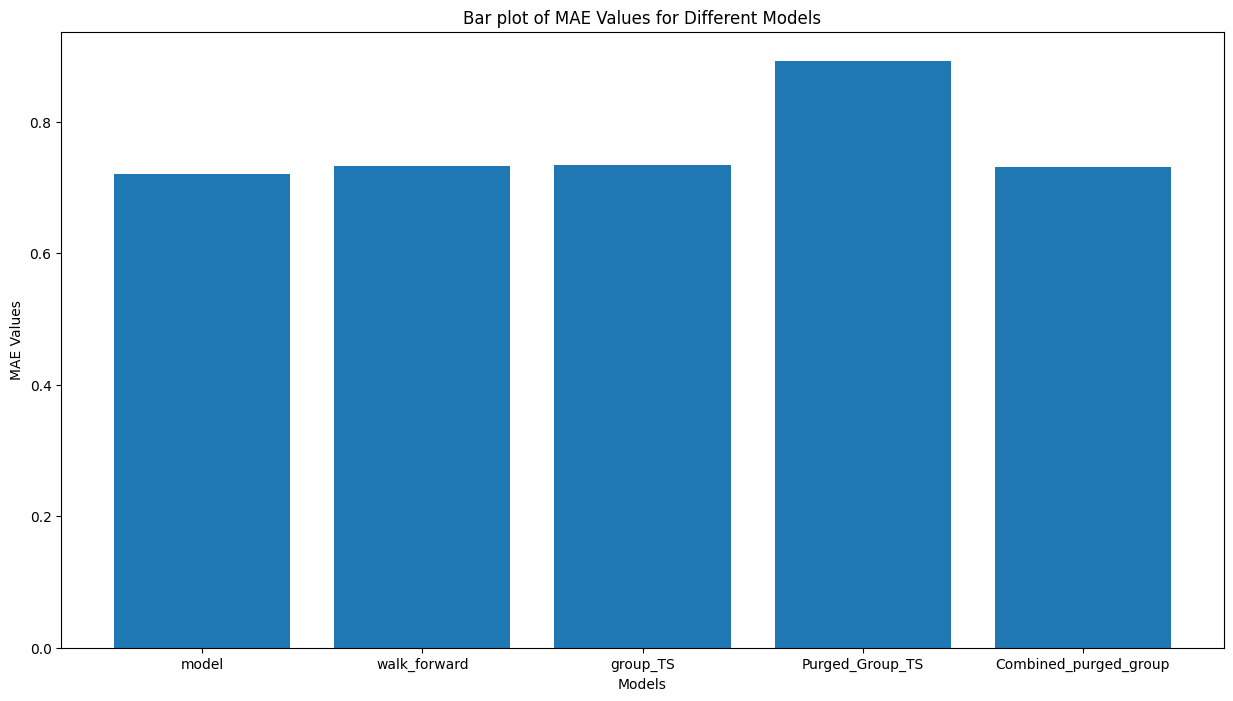

In [ ]:
models = [list(item.keys())[0] for item in mae_values]
values = [list(item.values())[0] for item in mae_values]

# Create the bar plot
plt.figure(figsize=(15, 8))

plt.bar(models, values)
plt.xlabel('Models')
plt.ylabel('MAE Values')
plt.title('Bar plot of MAE Values for Different Models')
plt.show()

In [ ]:
print("WAPE")
print (wape_values)
print("=============================")
print("MAE")
print (mae_values)

WAPE
[{'model': 111.10258440571256}, {'walk_forward': 112.82175403866417}, {'group_TS': 113.11664809166358}, {'Purged_Group_TS': 137.51817624127233}, {'Combined_purged_group': 112.69383548568723}]
MAE
[{'model': 0.7208098601939922}, {'walk_forward': 0.7319634659305828}, {'group_TS': 0.7338766756209923}, {'Purged_Group_TS': 0.8921885833783324}, {'Combined_purged_group': 0.7311335576545447}]


# Other Cross Validation


Here's how to implement cross-validation with LightGBM regression:

1. Import Necessary Libraries:

2. Prepare Data:

Load your dataset and split it into features (X) and target variable (y).
Preprocess the data as needed (e.g., handle missing values, scaling).
3. Define Model Parameters:

4. Perform Cross-Validation:

Explanation:

cross_val_score from scikit-learn is used for cross-validation.
lgb.LGBMRegressor represents the LightGBM regression model.
**params passes the defined parameters to the model.
cv=num_folds specifies the number of folds for cross-validation.

In [ ]:

# Specify number of folds for cross-validation
num_folds = 5  # Adjust as needed

# Perform cross-validation using cross_val_score
scores = cross_val_score(lgb.LGBMRegressor(**params), x_train, y_train, cv=num_folds)

# Access and print individual scores
print(scores)

# Calculate mean cross-validation score
print("Mean CV Score:", scores.mean())


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004306 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1372
[LightGBM] [Info] Number of data points in the train set: 85480, number of used features: 17
[LightGBM] [Info] Start training from score 0.780066
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004295 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1376
[LightGBM] [Info] Number of data points in the train set: 85480, number of used features: 17
[LightGBM] [Info] Start training from score 0.710213
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004373 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1375
[LightGBM] [Info] Number of data points in the train set: 85480, number of used features: 17
[LightGBM] [Info] Start training from score 0.784780
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004275 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1381
[LightGBM] [Info] Number of data points in the train set: 85480, number of used features: 17
[LightGBM] [Info] Start training from score 0.741554
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015872 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1381
[LightGBM] [Info] Number of data points in the train set: 85480, number of used features: 17
[LightGBM] [Info] Start training from score 0.798456
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[0.210195   0.33345005 0.30171082 0.35001776 0.16380637]
Mean CV Score: 0.2718359985059176


# Stratified K-Fold Cross-Validation:

Preserves class proportions in each fold, making it ideal for imbalanced datasets where one class has significantly more instances than others.
Use StratifiedKFold from scikit-learn:

In [ ]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5)  # Adjust n_splits as needed
scores = cross_val_score(lgb.LGBMRegressor(**params), x_train, y_train, cv=skf)

# Access and print individual scores
print(scores)

# Calculate mean cross-validation score
print("StratifiedKFold Mean CV Score:", scores.mean())


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004307 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1368
[LightGBM] [Info] Number of data points in the train set: 85480, number of used features: 17
[LightGBM] [Info] Start training from score 0.762553
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004338 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1380
[LightGBM] [Info] Number of data points in the train set: 85480, number of used features: 17
[LightGBM] [Info] Start training from score 0.763126
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.027712 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1376
[LightGBM] [Info] Number of data points in the train set: 85480, number of used features: 17
[LightGBM] [Info] Start training from score 0.763278
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.024176 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1382
[LightGBM] [Info] Number of data points in the train set: 85480, number of used features: 17
[LightGBM] [Info] Start training from score 0.763184
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004389 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1381
[LightGBM] [Info] Number of data points in the train set: 85480, number of used features: 17
[LightGBM] [Info] Start training from score 0.762927
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[0.29263199 0.30051145 0.35965733 0.30397328 0.32719762]
StratifiedKFold Mean CV Score: 0.3167943337875496


#Repeated K-Fold Cross-Validation:

Repeats K-fold cross-validation multiple times with different random splits of the data.
Provides a more stable and reliable estimate of model performance by averaging results across multiple repetitions.
Use RepeatedKFold from scikit-learn:

In [ ]:
from sklearn.model_selection import RepeatedKFold

rkf = RepeatedKFold(n_splits=5, n_repeats=3)  # Adjust n_splits and n_repeats
scores = cross_val_score(lgb.LGBMRegressor(**params), x_train, y_train, cv=rkf)

# Access and print individual scores
print(scores)

# Calculate mean cross-validation score
print("RepeatedKFold Mean CV Score:", scores.mean())


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004256 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1378
[LightGBM] [Info] Number of data points in the train set: 85480, number of used features: 17
[LightGBM] [Info] Start training from score 0.763781
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004250 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1377
[LightGBM] [Info] Number of data points in the train set: 85480, number of used features: 17
[LightGBM] [Info] Start training from score 0.765945
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004806 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1379
[LightGBM] [Info] Number of data points in the train set: 85480, number of used features: 17
[LightGBM] [Info] Start training from score 0.760260
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004258 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1377
[LightGBM] [Info] Number of data points in the train set: 85480, number of used features: 17
[LightGBM] [Info] Start training from score 0.758563
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004458 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1379
[LightGBM] [Info] Number of data points in the train set: 85480, number of used features: 17
[LightGBM] [Info] Start training from score 0.766518
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004363 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1378
[LightGBM] [Info] Number of data points in the train set: 85480, number of used features: 17
[LightGBM] [Info] Start training from score 0.761394
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004259 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1380
[LightGBM] [Info] Number of data points in the train set: 85480, number of used features: 17
[LightGBM] [Info] Start training from score 0.764073
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004787 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1374
[LightGBM] [Info] Number of data points in the train set: 85480, number of used features: 17
[LightGBM] [Info] Start training from score 0.765922
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004259 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1379
[LightGBM] [Info] Number of data points in the train set: 85480, number of used features: 17
[LightGBM] [Info] Start training from score 0.761418
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.023323 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1376
[LightGBM] [Info] Number of data points in the train set: 85480, number of used features: 17
[LightGBM] [Info] Start training from score 0.762260
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.022704 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1374
[LightGBM] [Info] Number of data points in the train set: 85480, number of used features: 17
[LightGBM] [Info] Start training from score 0.765431
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004262 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1378
[LightGBM] [Info] Number of data points in the train set: 85480, number of used features: 17
[LightGBM] [Info] Start training from score 0.760845
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004262 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1377
[LightGBM] [Info] Number of data points in the train set: 85480, number of used features: 17
[LightGBM] [Info] Start training from score 0.764518
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004299 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1379
[LightGBM] [Info] Number of data points in the train set: 85480, number of used features: 17
[LightGBM] [Info] Start training from score 0.762295
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.019256 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1371
[LightGBM] [Info] Number of data points in the train set: 85480, number of used features: 17
[LightGBM] [Info] Start training from score 0.761979
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[0.36099241 0.40732507 0.35663713 0.41784842 0.3177962  0.36281271
 0.36839269 0.40861978 0.36151423 0.35087612 0.37496163 0.36715444
 0.34807743 0.39069248 0.38515844]
RepeatedKFold Mean CV Score: 0.3719239456433489


# Leave-One-Out Cross-Validation (LOOCV):

Trains the model on all but one data point, which is used for testing.
Repeated for each data point, resulting in robust performance estimates but can be computationally expensive for large datasets.
Use LeaveOneOut from scikit-learn:

In [ ]:
from sklearn.model_selection import LeaveOneOut, cross_val_score
from sklearn.metrics import mean_squared_error
loo = LeaveOneOut()

# Initialize a list to store cross-validation scores
cv_scores = []

cnt = 0
# Perform cross-validation
for train_index, test_index in loo.split(x_train):
    X_train, X_test = x_train[train_index], x_test[test_index]
    Y_train, Y_test = y_train[train_index], y_test[test_index]

    model = lgb.LGBMRegressor(**params)
    #scores = cross_val_score(model, X_train, Y_train,)
    model.fit(X_train, Y_train)
    # Evaluate the model on the test data
    y_pred = model.predict(X_test)
    y_pred = y_pred.reshape((1, 1))
    ResultMse = mean_squared_error(Y_test, y_pred)
    cv_scores.append(ResultMse)
    cnt += 1

    if cnt == 3:
      break

# Calculate the mean cross-validation score
mean_cv_score = np.mean(cv_scores)
print(f'Mean Cross-Validation MSE: {mean_cv_score}')


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005363 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1386
[LightGBM] [Info] Number of data points in the train set: 106849, number of used features: 17
[LightGBM] [Info] Start training from score 0.763021
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005380 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1386
[LightGBM] [Info] Number of data points in the train set: 106849, number of used features: 17
[LightGBM] [Info] Start training from score 0.763011
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005524 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1386
[LightGBM] [Info] Number of data points in the train set: 106849, number of used features: 17
[LightGBM] [Info] Start training from score 0.763021
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
Mean Cross-Validation MSE: 0.3822996091647488
